data merged

images loaded

data splitted



C:\Users\eric\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model compiled

Epoch 1/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - loss: 68343072.0000 - mae: 5874.2915 - val_loss: 15733167.0000 - val_mae: 2298.9858
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 37s 133ms/step - loss: 17852040.0000 - mae: 3036.1804 - val_loss: 11466121.0000 - val_mae: 1908.9055
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 37s 136ms/step - loss: 16064277.0000 - mae: 2839.4939 - val_loss: 10588968.0000 - val_mae: 2055.9246
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - loss: 16196065.0000 - mae: 2885.9827 - val_loss: 10635485.0000 - val_mae: 1968.1846
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step - loss: 16253728.0000 - mae: 2889.0251 - val_loss: 10747014.0000 - val_mae: 2363.4895
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 38s 136ms/step - loss: 14564991.0000 - mae: 2746.7661 - val_loss: 12820305.0000 - val_mae: 1999.8934
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step - loss: 14805138.0000 - mae: 2803.2766 - val_loss: 9703731.0000 - val_mae: 1852.771

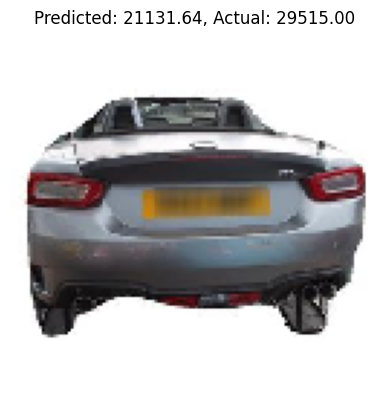

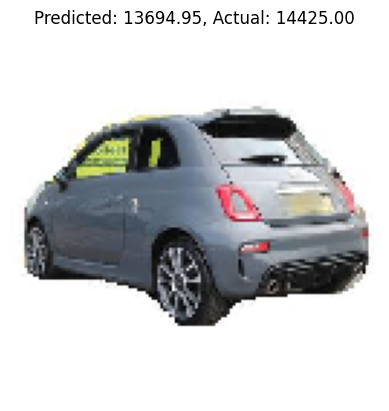

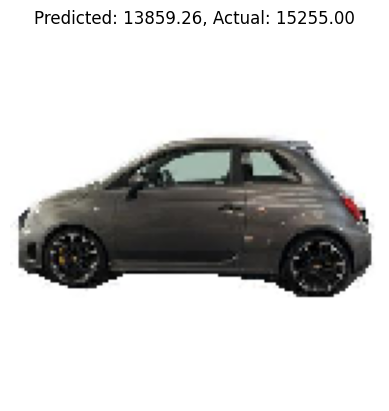

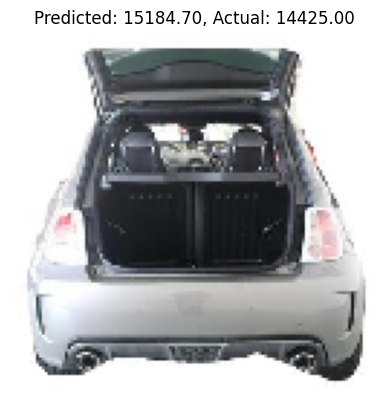

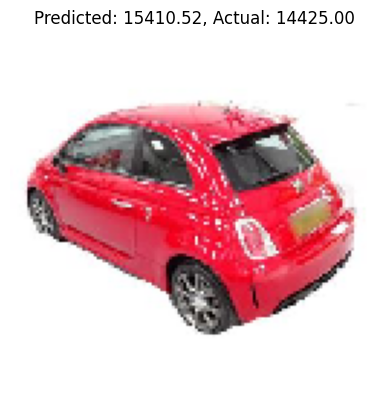

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# path to Image_table.csv
image_table = pd.read_csv('C:\\Users\\eric\\Desktop\\DVM_Car\\tables_V2.0\\Image_table.csv')  # Update with actual path
# path to Price_table.csv
price_table = pd.read_csv('C:\\Users\\eric\\Desktop\\DVM_Car\\tables_V2.0\\Price_table.csv')  # Update with actual path

# Merge the tables on 'Genmodel_ID' and keep relevant columns
# image_table contains image name, while price table contains price, and they share a column called 'Genmodel_ID'
# so we need to merge them
merged_data = pd.merge(image_table[['Genmodel_ID', 'Image_name']],
                       price_table[['Genmodel_ID', 'Entry_price']],
                       on='Genmodel_ID')

print("data merged\n")

# path to the training images
image_dir = 'C:\\Users\\eric\\Desktop\\DVM_Car\\DVM_noNest_test'  # Update with the directory path where images are stored

# Prepare image data and prices
img_size = 128  # Resize images to 128x128
images = []
prices = []

for idx, row in merged_data.iterrows():
    img_path = f"{image_dir}\\{row['Image_name']}"
    try:
        # Load and preprocess the image
        image = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
        image = tf.keras.preprocessing.image.img_to_array(image) / 255.0
        images.append(image)
        prices.append(row['Entry_price'])
    except Exception as e:
        #print(f"Error loading image {img_path}: {e}")
        break #shouldn't break, testing only

print("images loaded\n")

# Convert lists to arrays
images = np.array(images)
prices = np.array(prices)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(images, prices, test_size=0.2, random_state=42)

print("data splitted\n")

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

print("model compiled\n")

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

print("model trained\n")

# Evaluate model
loss, mae = model.evaluate(X_test, y_test)

print(f"Test MAE: {mae}")

# Predict prices
predictions = model.predict(X_test)

# shape: (number of images, height, width, channels)
print("X_test shape:", X_test.shape)

# display sample images and its corresponding predications
num_samples = 5  # Number of samples to display
for i in range(min(num_samples, len(X_test))):
    plt.imshow(X_test[i])  # Display the image
    plt.axis('off')  # Hide axes

    # Title with prediction and actual price
    plt.title(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test[i]:.2f}")

    plt.show()  # Show the plot for the current image

In [1]:
import tensorflow as tf

# Check if TensorFlow detects GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs detected: {gpus}")
else:
    print("No GPUs detected. Ensure the proper GPU drivers and CUDA/cuDNN are installed.")

GPUs detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
